In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import platform 
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'C:/Windows/Fonts/NGULIM.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/NanumGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
%matplotlib inline

## review data 불러오기

In [3]:
df = pd.read_csv('data/review_result.csv', encoding='utf-8')

In [4]:
df

,name,review,rate
0,월인당[한국관광 품질인증/Korea Quality],"지난 주말, 부모님과 함께 널찍한 노마루가 있는 산노을 방에서 묵었어요. 꽃피는 봄...",5.00
1,와담정[한국관광 품질인증/Korea Quality],월정교와도 가깝고 방도 넘 깨끗했습니다. 사장님도 너무 친절하시고 좋았어요. 특히 ...,5.00
2,와담정[한국관광 품질인증/Korea Quality],목조 한옥이다보니 벌레가 너무 많았어요. 톡톡이라고 깨알보다 작은 벌레들이 이불에도...,2.65
3,비센트호텔[한국관광 품질인증/Korea Quality],"아주 늦은시간 도착했는데 프론트 친절하시고, 객실정비도 잘 되어있고 수건도 넉넉해...",5.00
4,비센트호텔[한국관광 품질인증/Korea Quality],가격대비 만족합니다호텔도 깨끗한 편이에요,5.00
...,...,...,...
115139,공주한옥마을[한국관광 품질인증/Korea Quality],팀 워크숍을 준비하면서 어디가 적당할까하고 조사해본 결과 공주한옥마을을 선정했다. ...,5.00
115140,공주한옥마을[한국관광 품질인증/Korea Quality],어머니와 함께 사곡관 (공동 욕실과 화장실을 쓰는 개별방) 에 1박 투숙하였습니다....,4.00
115141,공주한옥마을[한국관광 품질인증/Korea Quality],지난 5월 가족여행으로 1박2일 공주를 다녀왔습니다. 공주 '한옥마을 정안관'에 숙...,5.00
115142,공주한옥마을[한국관광 품질인증/Korea Quality],지은지 얼마 안된 건물처럼 깨끗한 한옥시설을 갖추었다. 화장실도 신식으로 되어 있고...,5.00


In [5]:
print('전체 데이터의 갯수: {}'.format(len(df)))

전체 데이터의 갯수: 115144


## 리뷰 길이 시각화(히스토그램)

In [6]:
data_length = df['review'].apply(len)
data_length.head()

0    193
1    274
2    218
3    110
4     22
Name: review, dtype: int64

<ipython-input-7-722a1de314cd>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

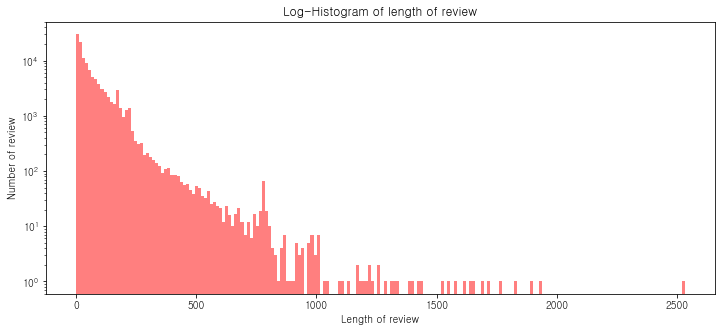

In [7]:
plt.figure(figsize=(12, 5))
plt.hist(data_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

## 리뷰 길이 통계값 확인

In [8]:
print('리뷰 길이 최댓값: {}'.format(np.max(data_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(data_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(data_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(data_length)))
print('리뷰 길이 중간값: {}'.format(np.median(data_length)))
print('리뷰 길이 제 1사분위: {}'.format(np.percentile(data_length, 25)))
print('리뷰 길이 제 3사분위: {}'.format(np.percentile(data_length, 75)))

리뷰 길이 최댓값: 2531
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 64.66
리뷰 길이 표준편차: 86.61
리뷰 길이 중간값: 33.0
리뷰 길이 제 1사분위: 13.0
리뷰 길이 제 3사분위: 85.0


## 리뷰 박스 플롯 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x223347b4880>,
 'caps': [<matplotlib.lines.Line2D at 0x223347b4f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x223347b4520>],
 'medians': [<matplotlib.lines.Line2D at 0x223347bd640>],
 'fliers': [<matplotlib.lines.Line2D at 0x223347bdd00>],
 'means': [<matplotlib.lines.Line2D at 0x223347bd9a0>]}

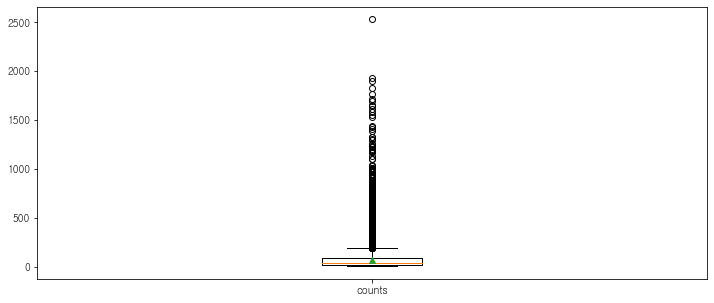

In [9]:
plt.figure(figsize=(12, 5))
plt.boxplot(data_length, labels=['counts'], showmeans=True)

## 리뷰 워드클라우드

(-0.5, 799.5, 599.5, -0.5)

<Figure size 1080x648 with 0 Axes>

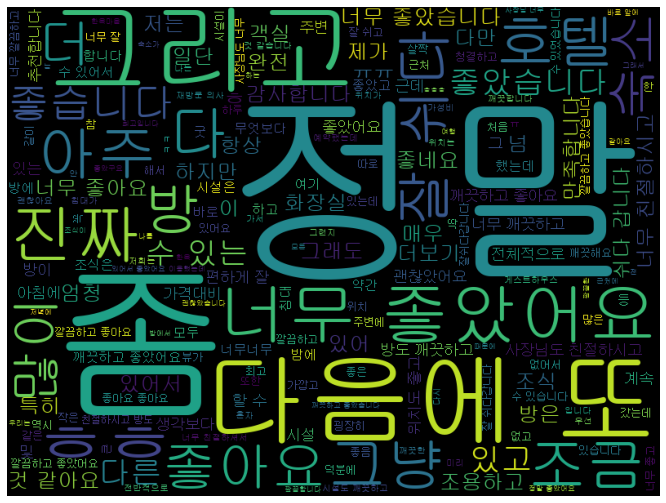

In [10]:
cloud = WordCloud(font_path=font_path, width=800, height=600).generate(" ".join(df['review']))
plt.figure(figsize=(15, 9))
plt.figure(figsize=(15, 9))
plt.imshow(cloud)
plt.axis('off')

## rate 분포 시각화

C:\Users\harry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rate', ylabel='count'>

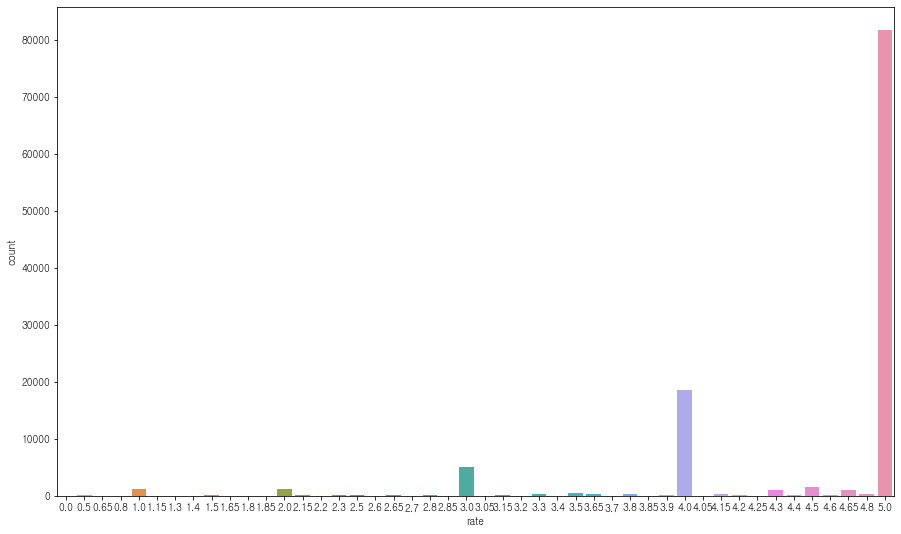

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(15, 9)
sns.countplot(df['rate'])

In [12]:
print('============== 리뷰 rate 분포 ==============')
print("{}".format(df['rate'].value_counts()))

============== 리뷰 rate 분포 ==============
5.00    81711
4.00    18606
3.00     5109
4.50     1607
2.00     1280
1.00     1203
4.65     1062
4.30      952
3.50      516
3.65      378
4.80      358
4.15      292
3.80      278
3.30      232
0.50      194
2.50      175
4.40      123
3.15      121
2.65      121
2.30      110
2.80      106
4.60       69
1.50       66
3.90       65
4.20       62
2.15       56
1.65       48
4.05       36
1.80       32
1.30       32
0.00       22
0.80       19
0.65       15
1.40       14
1.15       14
2.70       11
3.70       10
3.05        9
4.25        7
1.85        7
3.85        5
2.20        4
3.20        2
3.40        2
2.85        2
2.60        1
Name: rate, dtype: int64


## 리뷰당 단어 갯수 시각화

In [13]:
data_word_counts = df['review'].apply(lambda x:len(x.split(' ')))

<ipython-input-14-40dbd499e612>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

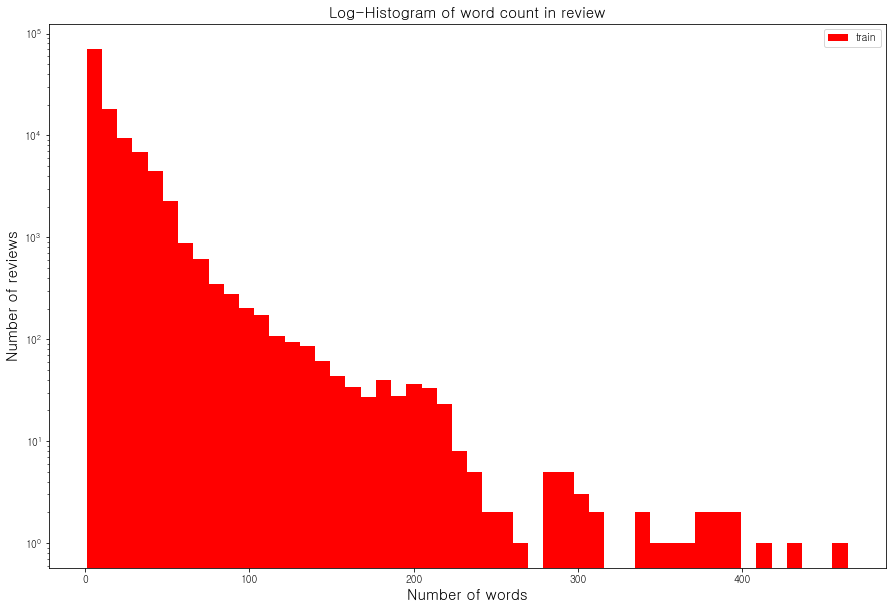

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(data_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

## 리뷰당 단어 갯수 통계값 확인

In [15]:
print('리뷰 단어 갯수 최댓값: {}'.format(np.max(data_word_counts)))
print('리뷰 단어 갯수 최솟값: {}'.format(np.min(data_word_counts)))
print('리뷰 단어 갯수 평균값: {:.2f}'.format(np.mean(data_word_counts)))
print('리뷰 단어 갯수 표준편차: {:.2f}'.format(np.std(data_word_counts)))
print('리뷰 단어 갯수 중간값: {}'.format(np.median(data_word_counts)))
print('리뷰 단어 갯수 제 1사분위: {}'.format(np.percentile(data_word_counts, 25)))
print('리뷰 단어 갯수 제 3사분위: {}'.format(np.percentile(data_word_counts, 75)))

리뷰 단어 갯수 최댓값: 464
리뷰 단어 갯수 최솟값: 1
리뷰 단어 갯수 평균값: 14.00
리뷰 단어 갯수 표준편차: 19.56
리뷰 단어 갯수 중간값: 7.0
리뷰 단어 갯수 제 1사분위: 3.0
리뷰 단어 갯수 제 3사분위: 18.0


## 데이터 특수문자 유무 확인

In [16]:
qmarks = np.mean(df['review'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(df['review'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문: 4.74%
마침표가 있는 질문: 34.51%
